<a href="https://colab.research.google.com/github/Ashuto7h/ML-works/blob/main/predict_churn_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [313]:
import pandas
import numpy
import matplotlib.pyplot as pyplot
import seaborn

train = pandas.read_csv('https://raw.githubusercontent.com/Ashuto7h/ML-works/main/predict_churn/files/train.csv')
test = pandas.read_csv('https://raw.githubusercontent.com/Ashuto7h/ML-works/main/predict_churn/files/test.csv')

In [314]:
train.describe()
# print(test.describe())

,age,days_since_last_login,avg_time_spent,avg_transaction_value,points_in_wallet,churn_risk_score
count,36992.000000,36992.000000,36992.000000,36992.000000,33549.000000,36992.000000
mean,37.118161,-41.915576,243.472334,29271.194003,686.882199,3.463397
std,15.867412,228.819900,398.289149,19444.806226,194.063624,1.409661
min,10.000000,-999.000000,-2814.109110,800.460000,-760.661236,-1.000000
25%,23.000000,8.000000,60.102500,14177.540000,616.150000,3.000000
50%,37.000000,12.000000,161.765000,27554.485000,697.620000,4.000000
75%,51.000000,16.000000,356.515000,40855.110000,763.950000,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,2069.069761,5.000000


In [315]:
train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36992 entries, 0 to 36991
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   customer_id                   36992 non-null  object 
 1   Name                          36992 non-null  object 
 2   age                           36992 non-null  int64  
 3   gender                        36992 non-null  object 
 4   security_no                   36992 non-null  object 
 5   region_category               31564 non-null  object 
 6   membership_category           36992 non-null  object 
 7   joining_date                  36992 non-null  object 
 8   joined_through_referral       36992 non-null  object 
 9   referral_id                   36992 non-null  object 
 10  preferred_offer_types         36704 non-null  object 
 11  medium_of_operation           36992 non-null  object 
 12  internet_option               36992 non-null  object 
 13  l

## Univariate and Bivariate analysis
#### 1. Customer Id
total 36992 unique values. 

#### 2. Name - This field is not necessary


In [316]:
del train['Name']
del test['Name']

#### 25. churn_risk_score

In [317]:
print(train['churn_risk_score'].value_counts())
train['churn_risk_score'].replace(0,3,inplace=True)
train['churn_risk_score'].replace(-1,3,inplace=True)
train['churn_risk_score'].value_counts()

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64


3    11587
4    10185
5     9827
2     2741
1     2652
Name: churn_risk_score, dtype: int64

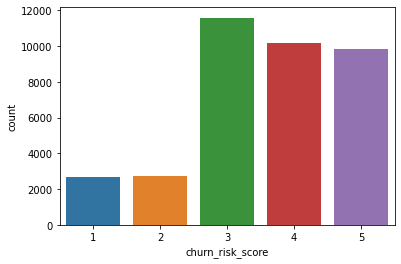

In [318]:
seaborn.countplot(data = train, x = 'churn_risk_score')

#### 3. age 

In [319]:
train['age'].replace(0,int(train['age'].mean()),inplace=True)

test['age'].replace(0,int(test['age'].mean()),inplace=True)

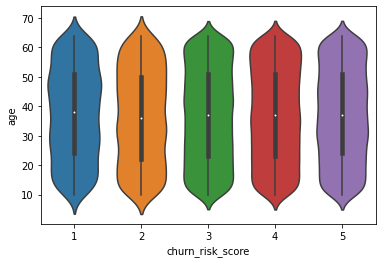

In [320]:
seaborn.violinplot(data = train, x = 'churn_risk_score', y = 'age')

__Conclusion__ : age doesn't have a major effect on target.

#### 4. Gender

In [321]:
print(train['gender'].value_counts())
train['gender'].replace('Unknown','F', inplace = True)
print(train['gender'].value_counts())

test['gender'].replace('Unknown','F', inplace = True)

F          18490
M          18443
Unknown       59
Name: gender, dtype: int64
F    18549
M    18443
Name: gender, dtype: int64


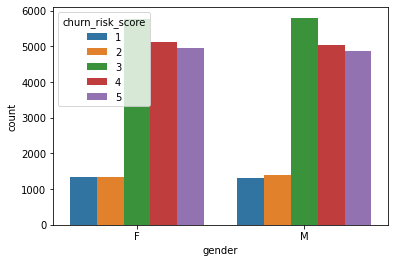

In [322]:
seaborn.countplot(data=train, x = 'gender', hue = 'churn_risk_score')

__Conclusion__ :  gender doesn't affects the target.

#### 5. security_no -
(Useless) a unique security_no used to identify a person


In [323]:
del train['security_no']
del test['security_no']

#### 6. region_category


In [324]:
print(train['region_category'].unique())
print(train['region_category'].value_counts())
print(train['region_category'].isna().sum())
train['region_category'].fillna('Town',inplace = True)
print(train['region_category'].value_counts())

test['region_category'].fillna('Town',inplace = True)

['Village' 'City' 'Town' nan]
Town       14128
City       12737
Village     4699
Name: region_category, dtype: int64
5428
Town       19556
City       12737
Village     4699
Name: region_category, dtype: int64


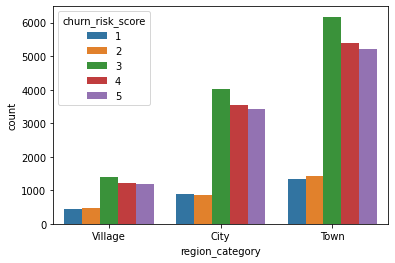

In [325]:
seaborn.countplot(data = train, x = 'region_category',hue = 'churn_risk_score')

__conclusion__ : region_category affects target.

#### 7. membership_category


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

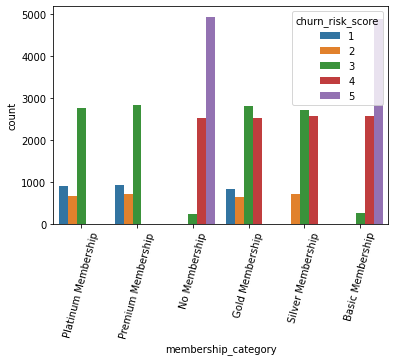

In [326]:
seaborn.countplot(data = train, x = 'membership_category', hue='churn_risk_score')
pyplot.xticks(rotation= 75)

__conclusion__ : membership_category affects churn risk score.

#### 8. joining_date
1096 unique dates.

from 2015-01-01 to 2017-12-31

not affects much, not required.

In [327]:
del train['joining_date']
del test['joining_date']

#### 9. joined_through_referral
there are some users who's `joined_through_referral = ?` but they have a unique `referral_id`.


In [328]:
print(train['joined_through_referral'].value_counts())
print(test['joined_through_referral'].value_counts())

No     15839
Yes    15715
?       5438
Name: joined_through_referral, dtype: int64
Yes    8617
No     8304
?      2998
Name: joined_through_referral, dtype: int64


In [329]:
train.loc[(train.referral_id == 'xxxxxxxx') & (train.joined_through_referral == '?'), 'joined_through_referral'] = 'No'

train.loc[(train.referral_id != 'xxxxxxxx') & (train.joined_through_referral == '?'),'joined_through_referral'] = 'Yes'

test.loc[(test.referral_id == 'xxxxxxxx') & (test.joined_through_referral == '?'), 'joined_through_referral'] = 'No'

test.loc[(test.referral_id != 'xxxxxxxx') & (test.joined_through_referral == '?'),'joined_through_referral'] = 'Yes'

print(train['joined_through_referral'].value_counts())
print(test['joined_through_referral'].value_counts())


Yes    20592
No     16400
Name: joined_through_referral, dtype: int64
Yes    11305
No      8614
Name: joined_through_referral, dtype: int64


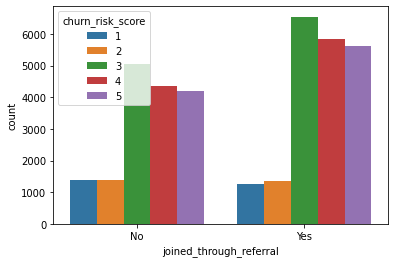

In [330]:
seaborn.countplot(data =train, x = 'joined_through_referral', hue = 'churn_risk_score')

__conclusion__ : joined_through_referral affects churn_risk_score.

#### 10. referral_id
it doesn't play a major role, because mostly one referral_id is used for only one referral. so it can be removed.


In [331]:
print('len' ,len(train['referral_id'].unique()))
print(train['referral_id'].value_counts())

del train['referral_id']
del test['referral_id']

len 11359
xxxxxxxx    17846
CID43705       12
CID3979        11
CID49601       10
CID23978        9
            ...  
CID25487        1
CID2008         1
CID14173        1
CID63242        1
CID33130        1
Name: referral_id, Length: 11359, dtype: int64


#### 11. preffered_offer_types

In [332]:
print(train['preferred_offer_types'].unique())
print(train['preferred_offer_types'].value_counts())
print('nan count  : ',  train['preferred_offer_types'].isna().sum())
print('nan count  : ',  test['preferred_offer_types'].isna().sum())

['Gift Vouchers/Coupons' 'Credit/Debit Card Offers' 'Without Offers' nan]
Gift Vouchers/Coupons       12349
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
nan count  :  288
nan count  :  159


replacing nan values with 'Gift Vouchers/Coupons'

In [333]:
train['preferred_offer_types'].fillna('Gift Vouchers/Coupons',inplace =True)
print(train['preferred_offer_types'].value_counts())

test['preferred_offer_types'].fillna('Gift Vouchers/Coupons',inplace =True)
print(test['preferred_offer_types'].value_counts())

Gift Vouchers/Coupons       12637
Credit/Debit Card Offers    12274
Without Offers              12081
Name: preferred_offer_types, dtype: int64
Without Offers              6663
Gift Vouchers/Coupons       6654
Credit/Debit Card Offers    6602
Name: preferred_offer_types, dtype: int64


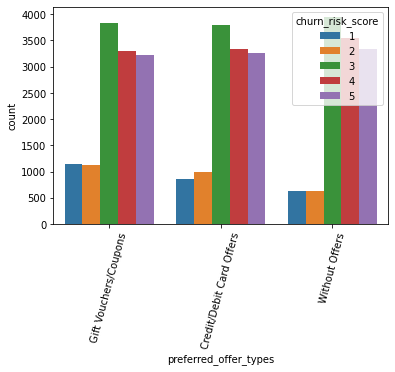

In [334]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'preferred_offer_types', hue ='churn_risk_score')

__conclusion__: preferred_offer_types affect target slightly.

#### 12. medium_of_operation

In [335]:
print(train['medium_of_operation'].unique())
print(train['medium_of_operation'].value_counts())
print()
print(test['medium_of_operation'].value_counts())

['?' 'Desktop' 'Smartphone' 'Both']
Desktop       13913
Smartphone    13876
?              5393
Both           3810
Name: medium_of_operation, dtype: int64

Desktop       7463
Smartphone    7405
?             2964
Both          2087
Name: medium_of_operation, dtype: int64


replacing all '?' with 'Desktop'

In [336]:
train['medium_of_operation'].replace('?','Desktop',inplace = True)
print(train['medium_of_operation'].value_counts())

test['medium_of_operation'].replace('?','Desktop',inplace = True)
print(test['medium_of_operation'].value_counts())

Desktop       19306
Smartphone    13876
Both           3810
Name: medium_of_operation, dtype: int64
Desktop       10427
Smartphone     7405
Both           2087
Name: medium_of_operation, dtype: int64


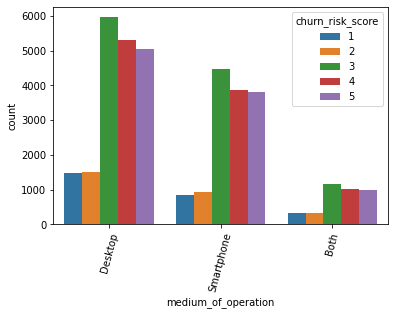

In [337]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'medium_of_operation', hue ='churn_risk_score')

__conclusion__ : medium of operation affects churn_risk_score

#### 13. internet_option


In [338]:
train['internet_option'].value_counts()

Wi-Fi          12413
Mobile_Data    12343
Fiber_Optic    12236
Name: internet_option, dtype: int64

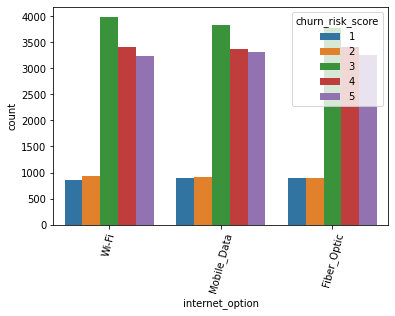

In [339]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'internet_option', hue ='churn_risk_score')

__conclusion__ : internet_option affects very slightly over the taget variable

#### 14. last_visit_time - not required

In [340]:
del train['last_visit_time']
del test['last_visit_time']

#### 15. days_since_last_login

In [341]:
print(train['days_since_last_login'].unique())

# replacing all negetive values with 0
train.loc[train.days_since_last_login < 0,'days_since_last_login'] = 0
test.loc[test.days_since_last_login < 0,'days_since_last_login'] = 0

train['days_since_last_login'].unique()


[  17   16   14   11   20   23   10   19   15   13 -999    5   12    9
   21   18    1   22    4    8    3    6    2   24    7   26   25]


array([17, 16, 14, 11, 20, 23, 10, 19, 15, 13,  0,  5, 12,  9, 21, 18,  1,
       22,  4,  8,  3,  6,  2, 24,  7, 26, 25])

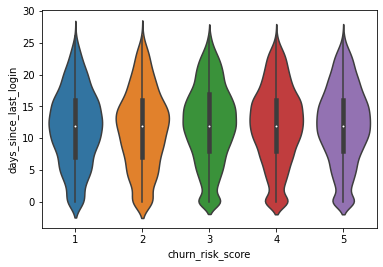

In [342]:
seaborn.violinplot(data =train, y = 'days_since_last_login',x='churn_risk_score')
pyplot.show()

__conclusion__ : days_since_last_login affects churn_risk_score.

#### 16. avg_time_spent
many values are negetive. replacing them with median

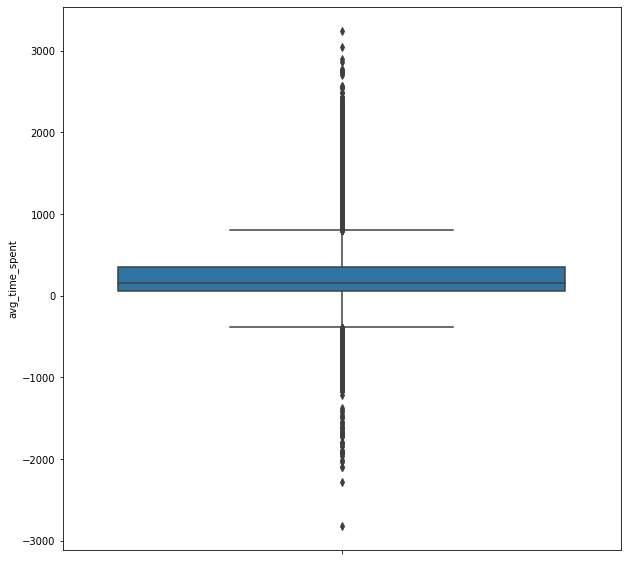

In [343]:
pyplot.figure(figsize = (10,10))
seaborn.boxplot(data= train, y = 'avg_time_spent',hue ='churn_risk_score')

In [344]:
# imputing outliers.
q_l = train['avg_time_spent'].quantile(0.01)
q_h = train['avg_time_spent'].quantile(0.99)
med = train['avg_time_spent'].median()

train.loc[(train.avg_time_spent < q_l) | (train.avg_time_spent > q_h),'avg_time_spent'] = med

test.loc[(test.avg_time_spent < q_l) | (test.avg_time_spent > q_h),'avg_time_spent'] = med

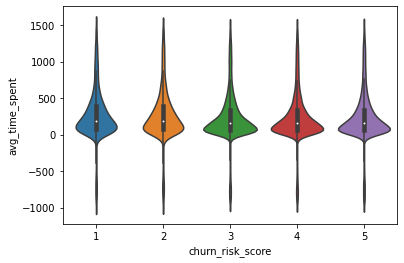

In [345]:
seaborn.violinplot(data =train, y = 'avg_time_spent',x='churn_risk_score')
pyplot.show()

#### 17. avg_transaction_value
discrete values in range 0 to 99914.05

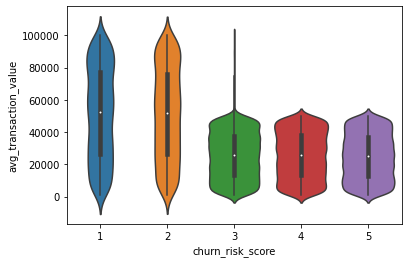

In [346]:
seaborn.violinplot(data =train, y = 'avg_transaction_value',x='churn_risk_score')
pyplot.show()

#### 18. avg_frequency_login_days

In [347]:
train['avg_frequency_login_days'].value_counts()

Error                  3522
13.0                   1394
19.0                   1365
8.0                    1361
14.0                   1355
                       ... 
39.81654827965219         1
52.371941621489285        1
-12.317872985757603       1
-1.527648918738869        1
46.38772405096287         1
Name: avg_frequency_login_days, Length: 1654, dtype: int64

In [348]:
train.loc[(train.avg_frequency_login_days == 'Error'),'avg_frequency_login_days'] =  0

train['avg_frequency_login_days'] = train['avg_frequency_login_days'].astype(str).astype(float)

train.loc[train.avg_frequency_login_days < 0, 'avg_frequency_login_days'] = 0

print(train['avg_frequency_login_days'].value_counts())


test.loc[(test.avg_frequency_login_days == 'Error'),'avg_frequency_login_days'] =  0

test['avg_frequency_login_days'] = test['avg_frequency_login_days'].astype(str).astype(float)

test.loc[test.avg_frequency_login_days < 0, 'avg_frequency_login_days'] = 0

0.000000     4205
13.000000    1394
19.000000    1365
8.000000     1361
14.000000    1355
             ... 
49.461645       1
33.147512       1
53.812360       1
47.535629       1
30.658806       1
Name: avg_frequency_login_days, Length: 971, dtype: int64


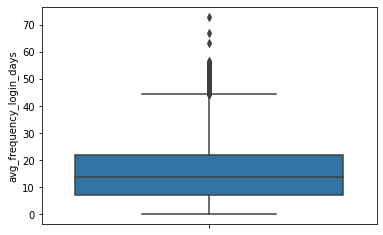

14.0


In [349]:
seaborn.boxplot(data=train, y = 'avg_frequency_login_days')
pyplot.show()
q_h = train['avg_frequency_login_days'].quantile(0.99)
med = train['avg_frequency_login_days'].median()
print(med)
train.loc[train.avg_frequency_login_days > q_h, 'avg_frequency_login_days'] = med
test.loc[test.avg_frequency_login_days > q_h, 'avg_frequency_login_days'] = med

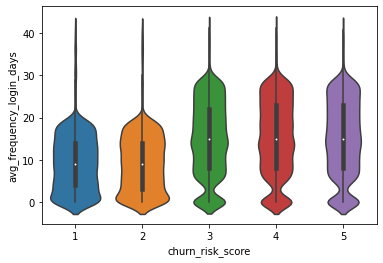

In [350]:
seaborn.violinplot(data =train, y = 'avg_frequency_login_days',x='churn_risk_score')
pyplot.show()

__conclusion__ : avg_frequency_login_days affects target.

#### 19. points_in_wallet

In [351]:
print(train['points_in_wallet'].isna().sum())
train['points_in_wallet'].fillna(train['points_in_wallet'].mean(),inplace = True)
print(train['points_in_wallet'].isna().sum())

test['points_in_wallet'].fillna(test['points_in_wallet'].mean(),inplace = True)

3443
0


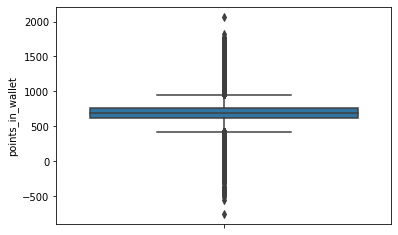

686.882198742908


In [352]:
seaborn.boxplot(data =train, y = 'points_in_wallet')
pyplot.show()
q_h = train['points_in_wallet'].quantile(0.99)
q_l = train['points_in_wallet'].quantile(0.01)
med = train['points_in_wallet'].median()
print(med)
train.loc[(train.points_in_wallet > q_h) | (train.points_in_wallet < q_l), 'points_in_wallet'] = med
test.loc[(test.points_in_wallet > q_h) | (test.points_in_wallet < q_l), 'points_in_wallet'] = med

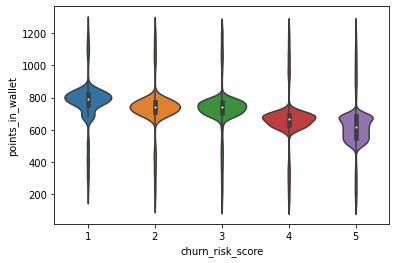

In [353]:
seaborn.violinplot(data =train, y = 'points_in_wallet',x='churn_risk_score')
pyplot.show()

__conclusion__ : points_in_wallet affects target.

#### 20. used_special_discount

In [354]:
print(train['used_special_discount'].value_counts())
train['used_special_discount'].replace(0,'No', inplace = True)
print(train['used_special_discount'].value_counts())

test['used_special_discount'].replace(0,'No', inplace = True)

Yes    20342
No     16650
Name: used_special_discount, dtype: int64
Yes    20342
No     16650
Name: used_special_discount, dtype: int64


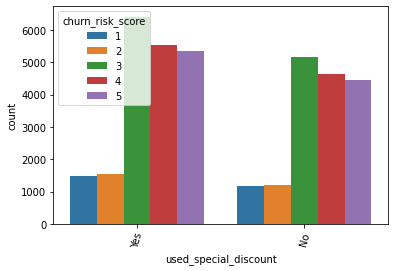

In [355]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'used_special_discount', hue ='churn_risk_score')

__conclusion__: used_special_discount affects target slightly

#### 21. offer_application_preference

In [356]:
print(train['offer_application_preference'].value_counts())
train['offer_application_preference'].replace(0,'No',inplace = True)
print(train['offer_application_preference'].value_counts())

test['offer_application_preference'].replace(0,'No',inplace = True)

Yes    20440
No     16552
Name: offer_application_preference, dtype: int64
Yes    20440
No     16552
Name: offer_application_preference, dtype: int64


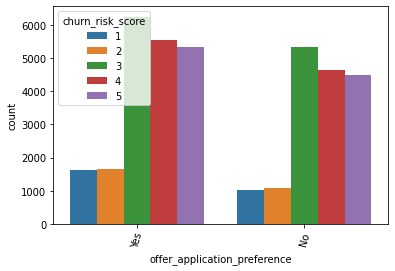

In [357]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'offer_application_preference', hue ='churn_risk_score')

__conclusion__ : offer_application_preference affects slightly

#### 22. past_complaint

In [358]:
print(train['past_complaint'].value_counts())
train['past_complaint'].replace(0,'No',inplace = True)
print(train['past_complaint'].value_counts())

test['past_complaint'].replace(0,'No',inplace = True)

No     18602
Yes    18390
Name: past_complaint, dtype: int64
No     18602
Yes    18390
Name: past_complaint, dtype: int64


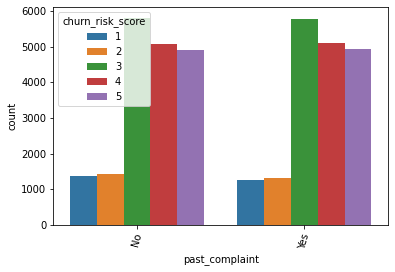

In [359]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'past_complaint', hue ='churn_risk_score')

__conclusion__ : past_complaints affect slightly.

#### 23. complaint_status

In [360]:
print(train['complaint_status'].value_counts())
train['complaint_status'].replace(0,'No Information Available',inplace = True)
print(train['complaint_status'].value_counts())

test['complaint_status'].replace(0,'No Information Available',inplace = True)

Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64
Not Applicable              18602
Unsolved                     4644
Solved                       4619
Solved in Follow-up          4577
No Information Available     4550
Name: complaint_status, dtype: int64


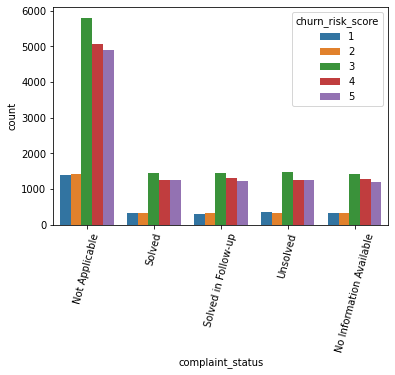

In [361]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'complaint_status', hue ='churn_risk_score')

__conclusion__ : complaint_status affects slightly.

#### 24. feedback

In [362]:
print(train['feedback'].value_counts())
train['feedback'].replace(0,'No reason specified', inplace = True)

test['feedback'].replace(0,'No reason specified', inplace = True)

Poor Product Quality        6350
No reason specified         6290
Too many ads                6279
Poor Website                6271
Poor Customer Service       6252
Reasonable Price            1417
User Friendly Website       1391
Products always in Stock    1382
Quality Customer Care       1360
Name: feedback, dtype: int64


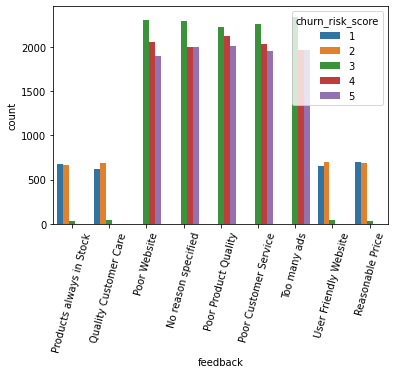

In [363]:
pyplot.xticks(rotation = 75)
seaborn.countplot(data = train, x = 'feedback', hue ='churn_risk_score')

__conclusion__: feedback majorly affects target.

## Other Visualizations
### all Box Plots

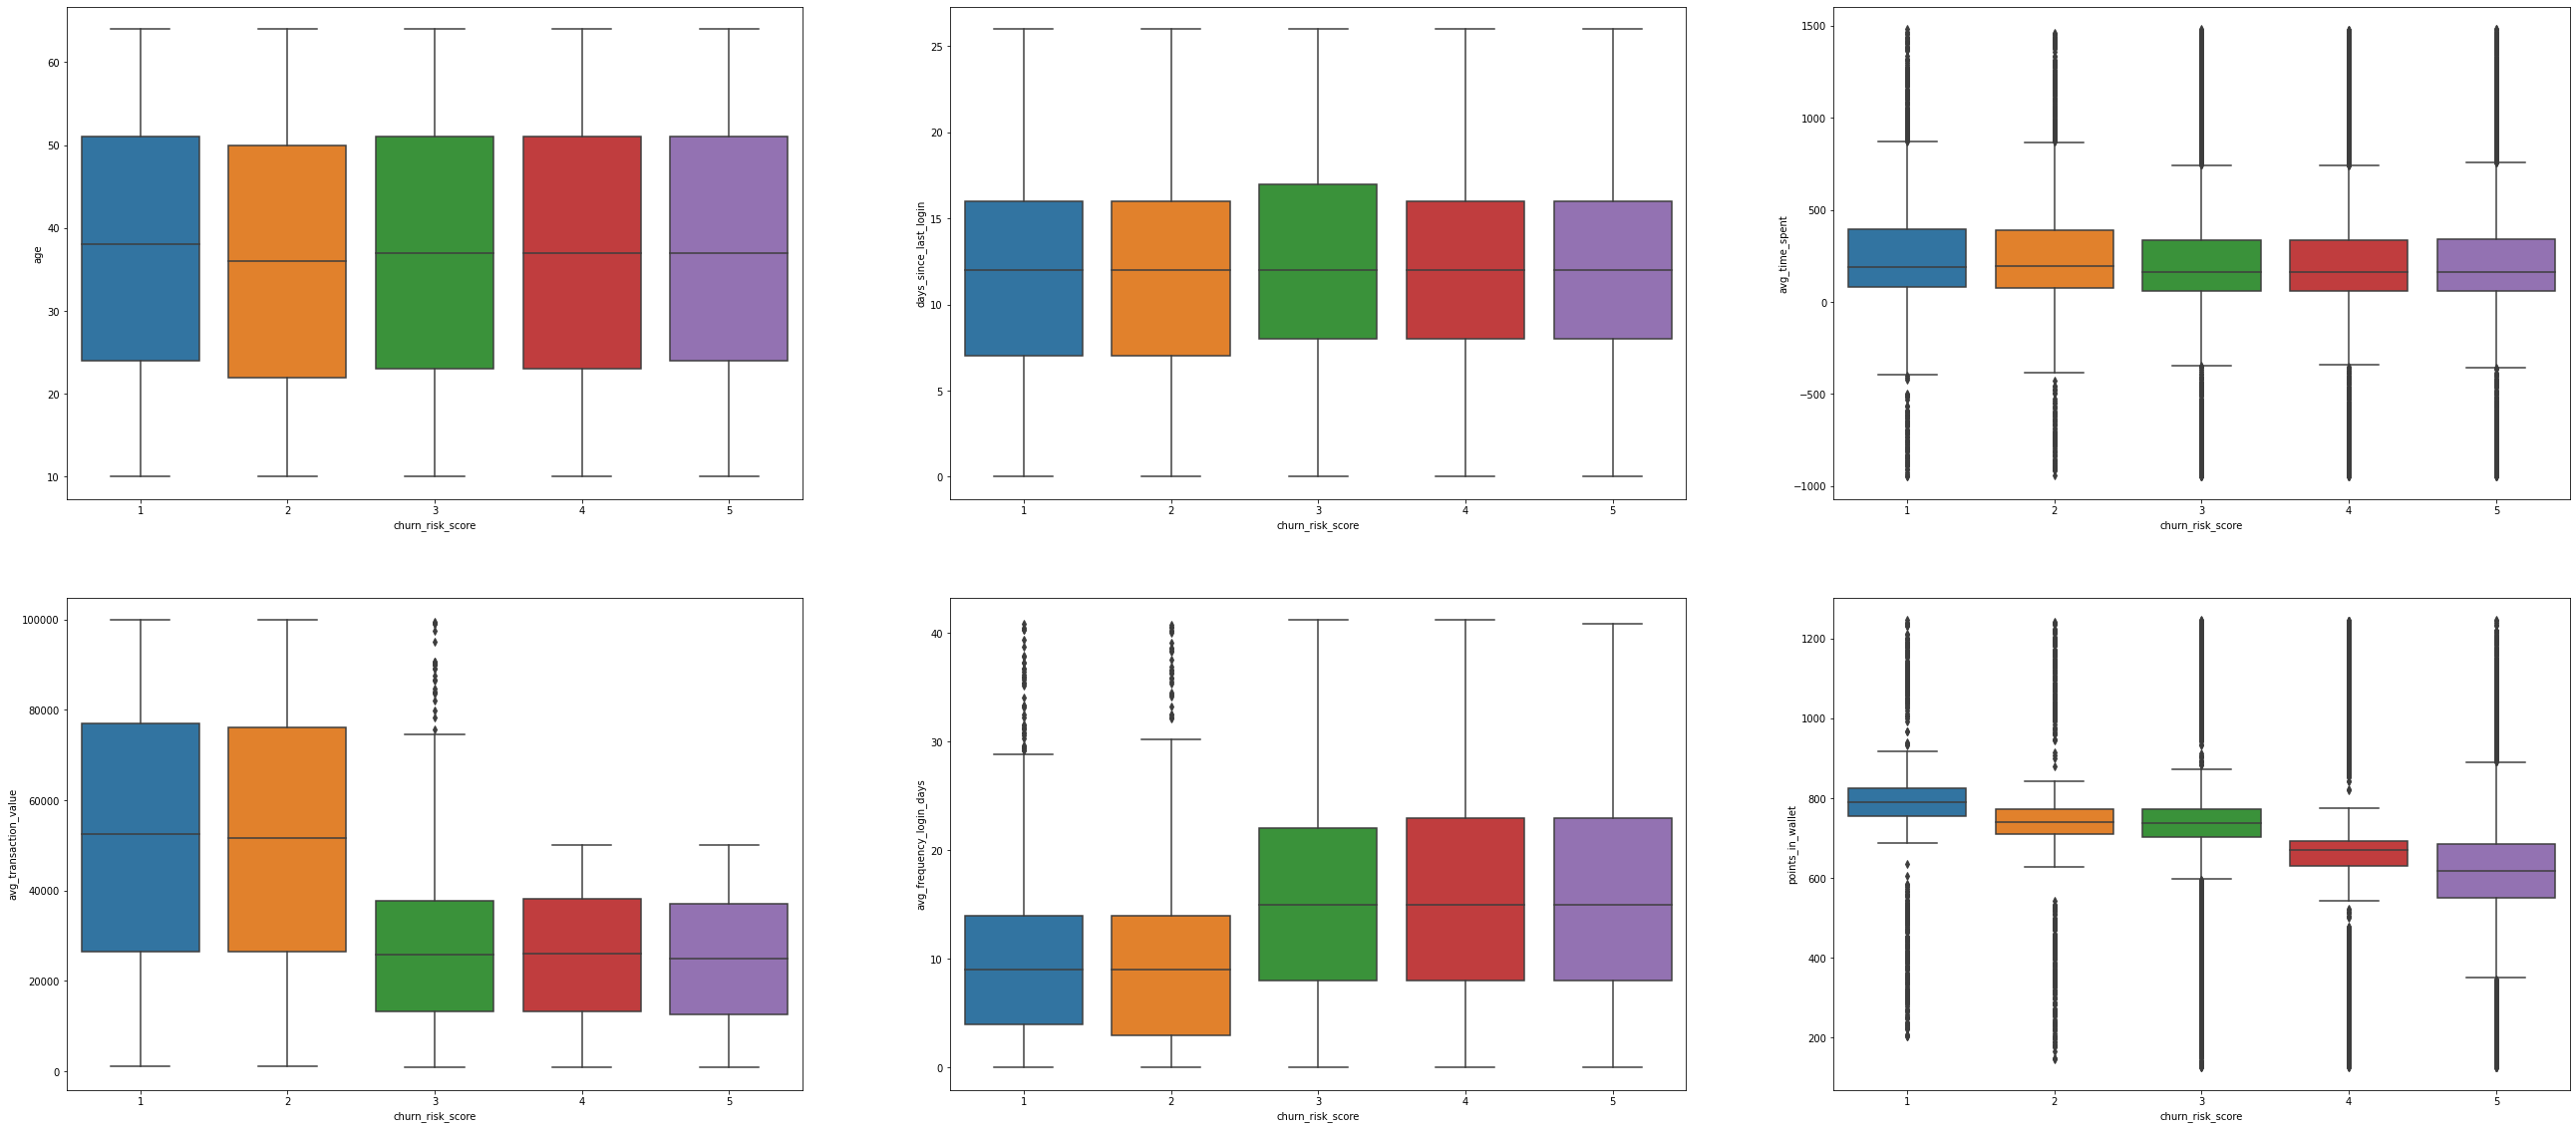

In [364]:
cols = ['age', 'days_since_last_login',	'avg_time_spent', 'avg_transaction_value','avg_frequency_login_days','points_in_wallet', 'churn_risk_score']
train_numer = pandas.DataFrame(data = train, columns = cols)

names = train_numer.columns;
ncols = len(names)
fig1 = pyplot.figure(figsize = (45,20))
axes = fig1.subplots(2, int(ncols/2))

for name, ax in zip(names, axes.flatten()):
    seaborn.boxplot(y=name, data=train_numer, x = 'churn_risk_score', ax=ax)
    
pyplot.show()

## Encoding Categorical data

In [365]:
cols = ['gender', 'region_category',
       'membership_category', 'joined_through_referral',
       'preferred_offer_types', 'medium_of_operation', 'internet_option',
      'used_special_discount',
       'offer_application_preference', 'past_complaint', 'complaint_status',
       'feedback']
train_dum = pandas.get_dummies(data = train, columns = cols, drop_first=True)
test_dum = pandas.get_dummies(data = test, columns = cols, drop_first=True)
train_dum

,customer_id,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,fffe4300490044003600300030003800,18,17,300.630000,53005.25,17.0,781.750000,2,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0
1,fffe43004900440032003100300035003700,32,16,306.340000,12838.38,10.0,686.882199,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0
2,fffe4300490044003100390032003600,44,14,516.160000,21027.00,22.0,500.690000,5,0,1,0,0,1,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0
3,fffe43004900440036003000330031003600,37,11,53.270000,25239.56,6.0,567.660000,5,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
4,fffe43004900440031003900350030003600,31,20,113.130000,24483.66,16.0,663.060000,5,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36987,fffe43004900440035003500390036003100,46,2,-650.682759,27277.68,6.0,639.510000,4,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
36988,fffe43004900440033003500380036003600,29,13,-638.123421,11069.71,28.0,527.990000,5,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0
36989,fffe4300490044003500330034003100,23,12,154.940000,38127.56,0.0,680.470000,4,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0
36990,fffe43004900440031003200390039003000,53,15,482.610000,2378.86,20.0,197.264414,3,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [367]:
train_dum.columns


Index(['customer_id', 'age', 'days_since_last_login', 'avg_time_spent',
       'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet',
       'churn_risk_score', 'gender_M', 'region_category_Town',
       'region_category_Village', 'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'joined_through_referral_Yes',
       'preferred_offer_types_Gift Vouchers/Coupons',
       'preferred_offer_types_Without Offers', 'medium_of_operation_Desktop',
       'medium_of_operation_Smartphone', 'internet_option_Mobile_Data',
       'internet_option_Wi-Fi', 'used_special_discount_Yes',
       'offer_application_preference_Yes', 'past_complaint_Yes',
       'complaint_status_Not Applicable', 'complaint_status_Solved',
       'complaint_status_Solved in Follow-up', 'complaint_status_Unsolved',
       'feedbac

## Train test split

In [368]:
from sklearn.model_selection import train_test_split
y = train_dum['churn_risk_score']
x = train_dum.drop(columns = ['churn_risk_score'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.8, random_state = 42)
# print(x_train,x_test,y_train,y_test, end= '\n')

train_cid = x_train['customer_id']
test_cid = x_test['customer_id']
x_train.drop(columns = ['customer_id'], inplace = True)
x_test.drop(columns = ['customer_id'], inplace = True)

valid_cid = test_dum['customer_id']
x_valid = test_dum.drop(columns = ['customer_id'])
# print(valid_cid,x_valid[:5])

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


## Over Sampling using smote


In [369]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
columns = x_train.columns
os_data_x, os_data_y = os.fit_sample(x_train, y_train)
x_train = pandas.DataFrame(data=os_data_x,columns=columns )
y_train = pandas.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(x_train))
print(len(y_train))

length of oversampled data is  11730
11730


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarni

## Normalising dataset

In [370]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
cols = x_train.columns
x_train = pandas.DataFrame(data = scaler.fit_transform(x_train),columns = cols)
x_test = pandas.DataFrame(data = scaler.transform(x_test),columns = cols)

x_valid = pandas.DataFrame(data = scaler.transform(x_valid), columns = cols)
x_train

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,gender_M,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,preferred_offer_types_Gift Vouchers/Coupons,preferred_offer_types_Without Offers,medium_of_operation_Desktop,medium_of_operation_Smartphone,internet_option_Mobile_Data,internet_option_Wi-Fi,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,complaint_status_Not Applicable,complaint_status_Solved,complaint_status_Solved in Follow-up,complaint_status_Unsolved,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.666667,0.692308,0.511704,0.651220,0.315820,0.548198,1.000000,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0
1,0.703704,0.538462,0.443750,0.058226,0.412996,0.559541,1.000000,1.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0
2,0.925926,0.153846,0.449501,0.631336,0.000000,0.598371,1.000000,1.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0
3,0.407407,0.884615,0.437962,0.194852,0.170057,0.501400,1.000000,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.259259,0.538462,0.566330,0.081397,0.194351,0.268067,0.000000,0.000000,1.000000,0.0,0.000000,0.0,1.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11725,0.817451,0.610266,0.252962,0.374654,0.139521,0.470504,0.876156,0.123844,0.000000,0.0,1.000000,0.0,0.0,0.0,0.876156,0.000000,0.123844,1.000000,0.000000,0.123844,0.876156,0.876156,1.000000,0.876156,0.123844,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.876156,0.0
11726,0.449700,0.609980,0.438633,0.007072,0.624615,0.351279,1.000000,0.856755,0.000000,0.0,0.143245,0.0,0.0,0.0,0.143245,0.000000,1.000000,0.000000,1.000000,0.000000,0.856755,0.856755,0.143245,0.856755,0.143245,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0
11727,0.840827,0.561487,0.731448,0.468175,0.573303,0.458039,1.000000,0.399667,0.000000,0.0,0.399667,0.0,0.0,0.0,0.600333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.600333,0.399667,1.000000,0.000000,0.000000,0.600333,0.399667,0.399667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
11728,0.814642,0.498032,0.470830,0.085221,0.211639,0.391030,0.618603,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.618603,0.381397,0.381397,0.618603,0.381397,0.000000,0.000000,1.000000,1.000000,0.000000,0.381397,0.618603,0.000000,0.000000,0.618603,0.0,0.0,0.0,0.0,0.000000,0.0


## Recursive Feature Elimination

result of RFE
```
age True 1
days_since_last_login True 1
avg_time_spent False 5
avg_transaction_value True 1
avg_frequency_login_days True 1
points_in_wallet True 1
gender_M True 1
region_category_Town True 1
region_category_Village False 6
membership_category_Gold Membership True 1
membership_category_No Membership True 1
membership_category_Platinum Membership True 1
membership_category_Premium Membership True 1
membership_category_Silver Membership True 1
joined_through_referral_Yes True 1
preferred_offer_types_Gift Vouchers/Coupons False 3
preferred_offer_types_Without Offers False 4
medium_of_operation_Desktop True 1
medium_of_operation_Smartphone True 1
used_special_discount_Yes True 1
offer_application_preference_Yes True 1
past_complaint_Yes False 2
complaint_status_Solved False 8
complaint_status_Solved in Follow-up False 9
complaint_status_Unsolved False 7
feedback_Poor Product Quality True 1
feedback_Poor Website True 1
feedback_Products always in Stock True 1
feedback_Quality Customer Care True 1
feedback_Reasonable Price True 1
feedback_Too many ads True 1
feedback_User Friendly Website True 1
```

In [373]:
x = x_train.columns.values.tolist()
y=['y']

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)
rfe = RFE(logreg,24)
rfe = rfe.fit(x_train, y_train.values.ravel())

print()
for col, support,rank in zip(x, rfe.support_, rfe.ranking_):
    print(col,support,rank)


age True 1
days_since_last_login True 1
avg_time_spent True 1
avg_transaction_value True 1
avg_frequency_login_days True 1
points_in_wallet True 1
gender_M False 3
region_category_Town True 1
region_category_Village True 1
membership_category_Gold Membership True 1
membership_category_No Membership True 1
membership_category_Platinum Membership True 1
membership_category_Premium Membership True 1
membership_category_Silver Membership True 1
joined_through_referral_Yes True 1
preferred_offer_types_Gift Vouchers/Coupons False 2
preferred_offer_types_Without Offers False 4
medium_of_operation_Desktop False 8
medium_of_operation_Smartphone False 9
internet_option_Mobile_Data False 12
internet_option_Wi-Fi False 11
used_special_discount_Yes True 1
offer_application_preference_Yes True 1
past_complaint_Yes False 13
complaint_status_Not Applicable False 7
complaint_status_Solved False 6
complaint_status_Solved in Follow-up False 10
complaint_status_Unsolved False 5
feedback_Poor Customer Ser

Removing Features suggested by RFE where all categorical variables can be removed.

In [374]:
cols = ['gender_M', 
        'preferred_offer_types_Gift Vouchers/Coupons',
        'preferred_offer_types_Without Offers',
        'medium_of_operation_Desktop',
        'medium_of_operation_Smartphone',
        'internet_option_Mobile_Data',
        'internet_option_Wi-Fi',
        'complaint_status_Not Applicable',
        'complaint_status_Solved',
        'complaint_status_Solved in Follow-up',
        'complaint_status_Unsolved']
x_train = x_train.drop(columns = cols)
x_test = x_test.drop(columns = cols)
x_valid = x_valid.drop(columns = cols)

Implementing model


In [375]:
x_train

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,region_category_Town,region_category_Village,membership_category_Gold Membership,membership_category_No Membership,membership_category_Platinum Membership,membership_category_Premium Membership,membership_category_Silver Membership,joined_through_referral_Yes,used_special_discount_Yes,offer_application_preference_Yes,past_complaint_Yes,feedback_Poor Customer Service,feedback_Poor Product Quality,feedback_Poor Website,feedback_Products always in Stock,feedback_Quality Customer Care,feedback_Reasonable Price,feedback_Too many ads,feedback_User Friendly Website
0,0.666667,0.692308,0.511704,0.651220,0.315820,0.548198,0.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0
1,0.703704,0.538462,0.443750,0.058226,0.412996,0.559541,1.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0
2,0.925926,0.153846,0.449501,0.631336,0.000000,0.598371,1.000000,0.000000,0.0,0.000000,1.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,1.0
3,0.407407,0.884615,0.437962,0.194852,0.170057,0.501400,1.000000,0.000000,0.0,1.000000,0.0,0.0,0.0,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.259259,0.538462,0.566330,0.081397,0.194351,0.268067,0.000000,1.000000,0.0,0.000000,0.0,1.0,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11725,0.817451,0.610266,0.252962,0.374654,0.139521,0.470504,0.123844,0.000000,0.0,1.000000,0.0,0.0,0.0,0.876156,0.876156,1.000000,0.876156,0.000000,0.000000,0.0,0.0,0.0,0.0,0.876156,0.0
11726,0.449700,0.609980,0.438633,0.007072,0.624615,0.351279,0.856755,0.000000,0.0,0.143245,0.0,0.0,0.0,0.143245,0.856755,0.143245,0.856755,0.000000,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0
11727,0.840827,0.561487,0.731448,0.468175,0.573303,0.458039,0.399667,0.000000,0.0,0.399667,0.0,0.0,0.0,0.600333,0.600333,0.399667,1.000000,0.399667,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
11728,0.814642,0.498032,0.470830,0.085221,0.211639,0.391030,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,1.000000,0.000000,0.618603,0.0,0.0,0.0,0.0,0.000000,0.0


In [376]:
y_train_unit = y_train.divide(5)
import statsmodels.api as sm
# print(y_train.shape,x_train.shape)
logit_model = sm.Logit(y_train_unit,x_train)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.431550
         Iterations 7
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.321     
Dependent Variable:          y                       AIC:                     10174.1553
Date:                        2021-04-01 06:44        BIC:                     10358.4030
No. Observations:            11730                   Log-Likelihood:          -5062.1   
Df Model:                    24                      LL-Null:                 -7453.5   
Df Residuals:                11705                   LLR p-value:             0.0000    
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              7.0000                                                     
----------------------------------------------------------------------------------------
                                         Coef

__conclusion__ : p(> 0.05) for 
avg_transaction_value,
gender_M, feedback_Poor Website, feedback_Too many ads

In [378]:
cols=['avg_transaction_value','joined_through_referral_Yes']

x_train.drop(columns = cols,inplace =True)
x_test.drop(columns = cols,inplace =True)
x_valid.drop(columns = cols,inplace =True)

logit_model=sm.Logit(y_train_unit,x_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.431664
         Iterations 7
                                     Results: Logit
Model:                       Logit                   Pseudo R-squared:        0.321     
Dependent Variable:          y                       AIC:                     10172.8309
Date:                        2021-04-01 06:46        BIC:                     10342.3387
No. Observations:            11730                   Log-Likelihood:          -5063.4   
Df Model:                    22                      LL-Null:                 -7453.5   
Df Residuals:                11707                   LLR p-value:             0.0000    
Converged:                   1.0000                  Scale:                   1.0000    
No. Iterations:              7.0000                                                     
----------------------------------------------------------------------------------------
                                         Coef

In [380]:
print(x_train.columns)
print(len(x_train.columns))

Index(['age', 'days_since_last_login', 'avg_time_spent',
       'avg_frequency_login_days', 'points_in_wallet', 'region_category_Town',
       'region_category_Village', 'membership_category_Gold Membership',
       'membership_category_No Membership',
       'membership_category_Platinum Membership',
       'membership_category_Premium Membership',
       'membership_category_Silver Membership', 'used_special_discount_Yes',
       'offer_application_preference_Yes', 'past_complaint_Yes',
       'feedback_Poor Customer Service', 'feedback_Poor Product Quality',
       'feedback_Poor Website', 'feedback_Products always in Stock',
       'feedback_Quality Customer Care', 'feedback_Reasonable Price',
       'feedback_Too many ads', 'feedback_User Friendly Website'],
      dtype='object')
23


# Building Models
## 1. Logistic Regression

In [381]:
# for normalized data
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept= True,max_iter = 1000)
logreg.fit(x_train,y_train)

print('\nAccuracy of train: {:.2f}'
     .format(logreg.score(x_train, y_train)))

y_pred = logreg.predict(x_test)
print('\nAccuracy of test: {:.2f}\n'
     .format(logreg.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy of train: 0.73

Accuracy of test: 0.69



##2. Stochastic Gradient Descent

In [383]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss = 'modified_huber',shuffle = False)
sgd.fit(x_train, y_train)
print('\nAccuracy on training set: {:.2f}'
     .format(sgd.score(x_train, y_train)))
print('\nAccuracy on test set: {:.2f}\n'
     .format(sgd.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Accuracy on training set: 0.54

Accuracy on test set: 0.55



##3. Gaussian Naive Bayes

In [382]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(x_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(x_test, y_test)))

Accuracy of GNB classifier on training set: 0.67
Accuracy of GNB classifier on test set: 0.61


/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##4. K Nearest Neighbours

In [384]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
print('\nAccuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(x_train, y_train)))
print('\nAccuracy of K-NN classifier on test set: {:.2f}\n'
     .format(knn.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Accuracy of K-NN classifier on training set: 0.82

Accuracy of K-NN classifier on test set: 0.61



##5. Linear Discriminant Analysis

In [385]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
print('Accuracy of LDA classifier on training set: {:.2f}'
     .format(lda.score(x_train, y_train)))
print('Accuracy of LDA classifier on test set: {:.2f}'
     .format(lda.score(x_test, y_test)))

Accuracy of LDA classifier on training set: 0.68
Accuracy of LDA classifier on test set: 0.65


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


##6. Support Vector Machine

In [386]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(x_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(x_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of SVM classifier on training set: 0.75
Accuracy of SVM classifier on test set: 0.66


##7. Decision Tree

In [387]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(x_train, y_train)
print('\nAccuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(x_train, y_train)))
print('\nAccuracy of Decision Tree classifier on test set: {:.2f}\n'
     .format(clf.score(x_test, y_test)))


Accuracy of Decision Tree classifier on training set: 1.00

Accuracy of Decision Tree classifier on test set: 0.73



##8. Random Forest


In [413]:
from sklearn.ensemble import RandomForestClassifier
rfm = RandomForestClassifier()
rfm.fit(x_train,y_train)
print('\nAccuracy on training set: {:.2f}'
     .format(rfm.score(x_train, y_train)))
print('\nAccuracy on test set: {:.2f}\n'
     .format(rfm.score(x_test, y_test)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until



Accuracy on training set: 1.00

Accuracy on test set: 0.75



### Neural Network

In [396]:
y_train_m =y_train.sub(1)

y    0
dtype: int64

In [407]:
from keras.models import Sequential
from keras.layers import Dense
import keras.losses as kloss
model = Sequential()
model.add(Dense(24, activation='relu', input_shape =(23,)))
model.add(Dense(48, activation='relu'))
model.add(Dense(5, activation ='sigmoid'))

model.compile(loss =kloss.SparseCategoricalCrossentropy(),optimizer='sgd', metrics=['accuracy'])

model.fit(x_train, y_train_m, epochs= 83, batch_size = 1, verbose = 1)

Epoch 1/90
11730/11730 [==============================] - 11s 896us/step - loss: 0.9221 - accuracy: 0.5551
Epoch 2/90
11730/11730 [==============================] - 11s 907us/step - loss: 0.6124 - accuracy: 0.6752
Epoch 3/90
11730/11730 [==============================] - 10s 895us/step - loss: 0.5918 - accuracy: 0.6883
Epoch 4/90
11730/11730 [==============================] - 11s 898us/step - loss: 0.5824 - accuracy: 0.7003
Epoch 5/90
11730/11730 [==============================] - 11s 899us/step - loss: 0.5823 - accuracy: 0.6930
Epoch 6/90
11730/11730 [==============================] - 10s 893us/step - loss: 0.5750 - accuracy: 0.6996
Epoch 7/90
11730/11730 [==============================] - 11s 901us/step - loss: 0.5780 - accuracy: 0.6931
Epoch 8/90
11730/11730 [==============================] - 11s 896us/step - loss: 0.5637 - accuracy: 0.7137
Epoch 9/90
11730/11730 [==============================] - 11s 905us/step - loss: 0.5676 - accuracy: 0.7053
Epoch 10/90
11730/11730 [============

In [412]:
y_test_m = y_test.sub(1)
score = model.evaluate(x_test,y_test_m, verbose = 1)
print(score)

y_pred = model.predict_classes(x_test)
from sklearn.metrics import classification_report

# Confusion matrix
print(classification_report(y_test_m, y_pred))

925/925 [==============================] - 1s 845us/step - loss: 0.6986 - accuracy: 0.7175
[0.6985943913459778, 0.717476487159729]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.62      0.70      0.66      2076
           1       0.68      0.62      0.65      2221
           2       0.94      0.77      0.85      9241
           3       0.60      0.63      0.61      8207
           4       0.68      0.79      0.73      7849

    accuracy                           0.72     29594
   macro avg       0.70      0.70      0.70     29594
weighted avg       0.73      0.72      0.72     29594



# Conclusion
Random Forest has high accurarcy over training and test set.


In [424]:
y_valid = rfm.predict(x_valid)
y_valid

array([3, 3, 4, ..., 5, 4, 3])

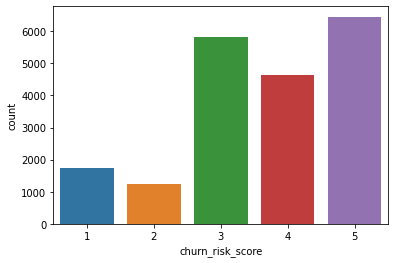

In [426]:
y_valid = pandas.DataFrame(data = y_valid, columns=['churn_risk_score'])
seaborn.countplot(data = y_valid, x= 'churn_risk_score')

In [427]:
submission = pandas.concat([valid_cid,y_valid],axis = 1)
submission

,customer_id,churn_risk_score
0,fffe43004900440031003700300030003400,3
1,fffe43004900440031003900370037003300,3
2,fffe43004900440034003800360037003000,4
3,fffe43004900440036003200370033003400,3
4,fffe43004900440035003000370031003900,5
...,...,...
19914,fffe43004900440035003600330037003800,3
19915,fffe43004900440032003900370037003100,5
19916,fffe43004900440036003100310036003700,5
19917,fffe43004900440034003200330033003600,4


In [428]:
submission.to_csv('submission.csv')